# opencv - 图像处理和计算机视觉    

## 图像的输入和输出     


### 1. 读入并显示图像    

imread() 返回的是一个 numpy 数组类型的数据.   
cvtColor(img, cv2.COLOR_BGR2GRAY) 将彩色图像转换为灰度图, 第二个参数为颜色转换常数, 以 COLOR_ 开头.    

**Note:**   
(1) imread()没有设置第二个参数, 其默认值为 IMREAD_COLOR. 其他可选值为:IMREAD_GRAYSCALE(始终将图像转换成灰度, 8位图),IMREAD_ANYDEPTH(如转换为单通道, 位数有图像决定), IMREAD_ANYCOLOR(转换为 8 位图, 通道数由图像文件决定, 注意 4 通道会被转为 3 通道),IMREAD_UNCHANGED(alpha 透明图, 在新版本中废置). 
(2) imread() 读入的彩色图像是按照 蓝,绿,红 的顺序排列. 这种顺序与 matplotlib 的 imshow() 函数所需的通道顺序正好相反. 因此, 如需要在 matplotlib 中显示图像, 则需要反转第 2 轴: `img[:, :, ::-1]`(之前是rgb, -1 表示以 bgr 的顺序取值. 其中 "-" 表示反向, 1 表示步长).     
(3) cv2 模块下的图像处理函数都能直接对 numpy 数组进行操作, 在这些函数内部会将 numpy 数组转换成 opencv 中表示图像的对象.虽然在调用 cv2 模块下的函数时会进行类型转换, 但是 numpy 数组与 opencv 的图像对象能够共享内存, 因此可以减少内存空间, 同时提高计算效率.         

In [1]:
import matplotlib.pyplot as plot
import numpy as np
import cv2

filename = "group.jpg"
img = cv2.imread(filename)

if img is not None:
    print(type(img), "shape: ", img.shape, "dtype: ", img.dtype)
    #cv2.namedWindow("demo")
    cv2.imshow("demo", img)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(img_gray.shape, img_gray.dtype)
    # maplotlib
    plot.imshow(img[:,:,::-1])
    
    key = cv2.waitKey(0)
    if key:
        cv2.destroyAllWindows()

<class 'numpy.ndarray'> shape:  (319, 480, 3) dtype:  uint8
(319, 480) uint8


### 2. 图像类型      

单通道可以表示灰度图, 三通道可以表示彩色图像, 4 通道可以表示带透明度(alpha)的彩色图像. 通道的数组类型也可以有多种选择.    
对于前面的彩色图像, shape:  (319, 480, 3) 表示高为 319, 宽为 480, 通道数为 3. dtype:  uint8 表示每个通道的颜色值都是用一个字节表示.而灰度图的 shape 则是一个二维数组, 因为它只有一个通道.         

### 3. 图像的输出        

imwrite() 将数组编码成指定图像格式后写入文件, 图像的格式由文件的扩展名决定.某些格式有额外的图像参数, 例如 JPEG 格式的文件就可以指定画质参数值.     

所有的参数都是以 IMWRITE_ 开头, 图像参数以`[参数名, 参数值, 参数名, 参数值]`的形式传递给 imwrite() 函数的第三个参数.    

当图像格式支持更高的位数时, imwrite() 会保持图像数组的精度.其中, JPEG 格式只支持 8 位数据, 而 png 格式可以支持 8 位和 16 位.    

In [2]:
for quality in [90, 60, 30]:
    cv2.imwrite("group_{:02d}.jpg".format(quality), img, [cv2.IMWRITE_JPEG_QUALITY, quality])

In [3]:
## JPEG 和 png 的位深度支持   
pass


### 4. 字节序列和图像序列的相互转换     

imdecode() 可以把图像文件数据解码成图像数组, imencode() 则可以把图像数组编码成图像文件数据.   
使用这两个函数可以快速压缩和解压缩图像, 例如把从摄像头读入的图像数组编码后通过网络传递给其他计算机.    



In [4]:
## 解压缩/压缩
with open("nvidia.png", "rb") as f:
    png_str = f.read() 
    png_data = np.frombuffer(png_str, np.uint8)   # 通过 frombuffer() 创建一个和 png_str 共享内存空间的数组 png_data
    img = cv2.imdecode(png_data, cv2.IMREAD_UNCHANGED)  # IMREAD_UNCHANGED
    
    res, jpg_data = cv2.imencode(".jpg", img)  # jpg_data 是压缩之后的数据, 形状为(N, 1). res 表示压缩是否成功 
    jpg_str = jpg_data.tobytes()
    
    print(jpg_data.shape)

(7164, 1)


### 5. 视频输入        

VideoCapture 类用于从视频文件或这视频设备读入图像.   

**Note**:    
- 对于视频文件, 可以获取视频的帧率, 总帧数, 视频宽, 高和当前帧数 index 等这些属性, 可以设置当前帧数 index.   
- 对于视频设备, 可以设置视频的帧率, 视频宽, 高, 视频保存格式(CAP_PROP_FOURCC, 'M','P','E','G')等这些属性.   
- 如果在 iPython 中使用出错, 试试`jupyter-notebook --allow-root`.    

In [5]:
## 视频文件   
#print(cv2.__version__)
video = cv2.VideoCapture("bike.avi")
print("FPS: ", video.get(cv2.CAP_PROP_FPS))  ## opencv 3.4 的 cv2 中没有 cv 模块了
print("FRAMES: ", video.get(cv2.CAP_PROP_FRAME_COUNT))  ## opencv 3.4 的 cv2 中没有 cv 模块了
print("Width: ", video.get(cv2.CAP_PROP_FRAME_WIDTH))   
print("Height: ", video.get(cv2.CAP_PROP_FRAME_HEIGHT))   

print("Current Frames: ", video.get(cv2.CAP_PROP_POS_FRAMES))   
res, frame = video.read()
print("Current Frames: ", video.get(cv2.CAP_PROP_POS_FRAMES))   
video.set(cv2.CAP_PROP_POS_FRAMES, 50)
print("Current Frames: ", video.get(cv2.CAP_PROP_POS_FRAMES))   

FPS:  15.0
FRAMES:  119.0
Width:  320.0
Height:  240.0
Current Frames:  0.0
Current Frames:  1.0
Current Frames:  50.0


In [6]:
## 视频设备
camera = cv2.VideoCapture(0)
res, frame = camera.read()
print("shape: ", frame.shape)

camera.set(cv2.CAP_PROP_FRAME_WIDTH, 800)   
camera.set(cv2.CAP_PROP_FRAME_HEIGHT, 600)
res, frame = camera.read()
print("shape: ", frame.shape)
cv2.namedWindow("800*600", cv2.WINDOW_NORMAL)
cv2.imshow("800*600", frame)
key = cv2.waitKey(0)
if key:
    cv2.destroyAllWindows()
camera.release()

#print(res, frame.shape())

shape:  (480, 640, 3)
shape:  (480, 640, 3)


### 6. 视频输出     

通过 VideoWriter 类可以将多个 numpy 数组写入视频文件.    
视频文件的编码由 4 个字符的 FOURCC 对象指定.

```python
vw = cv2.VideoWriter("test.avi", cv2.VideoWriter_fourcc('M','P','E','G'), 15, (800, 600), True)

vw.write(img)
vw.release()
```
其中:     

- 第一个参数为视频名;    
- 第二个参数为视频编码格式;    
- 第三个参数为帧率;    
- 第四个参数为宽,高;    
- 第五个参数为 True, 表示为彩色视频;    


## 图像处理    

### 1. 二维卷积     
图像处理中最基本的算法就是将图像和某个卷积核进行卷积, 使用不同的卷积核可以得到各种不同的图像处理效果.   

```python
filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst    
```
其中:     

- ddepth 参数用于指定输出(dst)图像的每个通道的数据类型, 负数表示和原始图像相同.    
- kernel 用于设置卷积核.    
- archor 用于指定卷积核的锚点的位置, 默认为(-1, -1), 即卷积核的中心.    
- delta 用于指定在将计算结果存储到 dst 中之前对数值的偏移量.    

对于卷积核尺寸较大时, 运算速度会很慢, 这时 filter2D 将会使用离散傅里叶变换来进行卷积计算.    

```python
sepFilter2D(src, ddepth, kernelX, kernelY[, dst[, anchor[, delta[, borderType]]]]) -> dst
```
有些特殊的卷积核可以表示为一个列向量和一个行向量的乘积.    
可以使用 `cv2.getGaussianKernel(7, -1)` 来获取 kernelX 和 kernelY.    


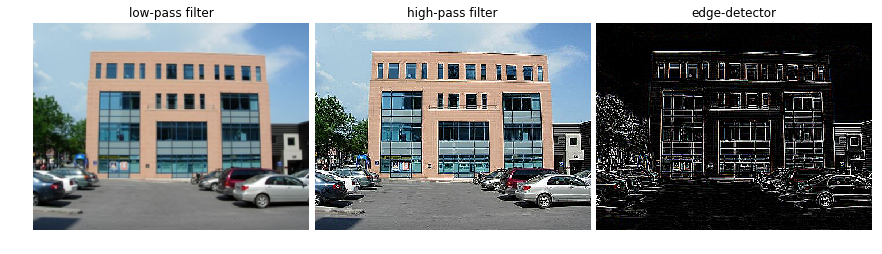

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread("building.jpg", cv2.IMREAD_COLOR)

kernels = [
    (u'low-pass filter', np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]])*0.1), 
    (u'high-pass filter', np.array([[0.0, -1, 0], [-1, 5, -1], [0, -1, 0]])), 
    (u'edge-detector', np.array([[-1.0, -1, -1], [-1, 8, -1], [-1, -1, -1]]))
]

index = 0 
fig, axes = plt.subplots(1, 3, figsize = (12, 4.3))
for ax, (name, kernel) in zip(axes, kernels):
    dst = cv2.filter2D(src, -1, kernel)
    
    ax.imshow(dst[:,:,::-1])
    ax.set_title(name)
    ax.axis("off")
fig.subplots_adjust(0.01, 0, 0.98, 1, 0.02, 0)
plt.show(10)

### 2. 形态学运算    

dilate() 对图像进行膨胀处理;     
erode() 对图像进行腐蚀处理;     
morphologyEx() 使用膨胀和腐蚀实现更高级的形态学处理;    

这些函数都可以对多值图像进行处理.  

```python
dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
```

其中:    

- iterations 指定形态学处理的次数;    
- op 用于指定运算类型(MORPH_OPEN, MORPH_CLOSE, MORPH_GRADIENT, MORPH_TOPHAT, MORPH_BLACKHAT);     
  

### 3. 填充 - floodFill    

填充函数 floodFill() 在图像处理中经常用于表示或分离图像中某些特定的部分.    

```python
floodFill(image, mask, seedPoint, newVal[, loDiff[, upDiff[, flags]]]) -> retval, image, mask, rect
```

其中:      

- image 是需要填充的图像;    
- mask 是;    
- seedPoint 是填充的起始点, 称为种子点;     
- newVal 是填充所用的颜色;    
- loDiff 和 upDiff 是填充的下限和上限容差;    
- flags 是填充的算法( FLOODFILL_MASK_ONLY, FLOODFILL_FIXED_RANGE);    



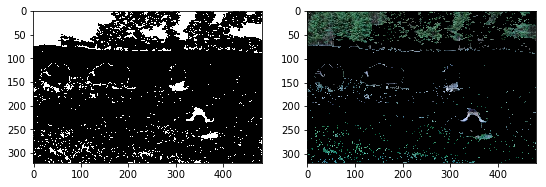

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("group.jpg")
seed1 = 344, 188
seed2 = 152, 126
diff = (18, 18, 18)
h,w = img.shape[:2]
mask = np.zeros((h + 2, w + 2), dtype=np.uint8)

cv2.floodFill(img, mask, seed1, (0, 0, 0), diff, diff, cv2.FLOODFILL_MASK_ONLY)
cv2.floodFill(img, None, seed1, (0, 0, 0), diff, diff)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
axes[0].imshow(~mask, cmap="gray")
axes[1].imshow(img)

In [11]:
 print(help(cv2.floodFill))

Help on built-in function floodFill:

floodFill(...)
    floodFill(image, mask, seedPoint, newVal[, loDiff[, upDiff[, flags]]]) -> retval, image, mask, rect
    .   @brief Fills a connected component with the given color.
    .   
    .   The function cv::floodFill fills a connected component starting from the seed point with the specified
    .   color. The connectivity is determined by the color/brightness closeness of the neighbor pixels. The
    .   pixel at \f$(x,y)\f$ is considered to belong to the repainted domain if:
    .   
    .   - in case of a grayscale image and floating range
    .   \f[\texttt{src} (x',y')- \texttt{loDiff} \leq \texttt{src} (x,y)  \leq \texttt{src} (x',y')+ \texttt{upDiff}\f]
    .   
    .   
    .   - in case of a grayscale image and fixed range
    .   \f[\texttt{src} ( \texttt{seedPoint} .x, \texttt{seedPoint} .y)- \texttt{loDiff} \leq \texttt{src} (x,y)  \leq \texttt{src} ( \texttt{seedPoint} .x, \texttt{seedPoint} .y)+ \texttt{upDiff}\f]
    .   


In [8]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('sachin.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
cam = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

while True:
    _, img = cam.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    cv2.imshow('img',img)
    key = cv2.waitKey(0) & 0xff
    if key == 27:
        break

cam.release()